<a href="https://colab.research.google.com/github/atc857/edapnadc/blob/main/Aula2_EDA_PNADc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos microdados da PNAD contínua

Disciplina: Metodologia Científica 2 (Métodos Quantitativos)

por André T. Campos

A Pesquisa Nacional por Amostra de Domicílios contínua (PNADc) é o principal
levantamento socioeconômico realizado no país. Sua divulgação tem distintas periodicidades: 1) mensal, para um conjunto restrito de indicadores associados à força de trabalho, sendo limitada ao nível geográfico do Brasil; 2) trimestral, para todos os níveis geográficos contemplados pela pesquisa, com a ressalva de que esta se limita a temas associados à população e à força de trabalho; e 3) anual, para os demais temas permanentes e indicadores complementares à força de trabalho.  Neste *notebook* exploraremos os microdados da pesquisa trimestral.

Para maiores informações sobre a PNAD consulte https://repositorio.ufrn.br/bitstream/123456789/48507/1/PorDentrodaPNADContinua_Trov%C3%A3o_SilvaJ%C3%BAnior_2022.pdf.

Os dados da PNAD contínua são disponibilizados no site do IBGE
https://ftp.ibge.gov.br/Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_continua/

Utilizaremos o pacote `pnadc` para efetuar o download e transformação dos arquivos em *dataframe* do pandas. A documentação sobre o pacote está disponível em https://pnadc.readthedocs.io/en/latest/readme.html.


In [ ]:
# https://pnadc.readthedocs.io/en/latest/installation.html
# This is an unofficial and simple python package to deal with IBGE-PNADc microdata.
!pip install pnadc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importação das bibliotecas
import pnadc
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Microdados da PNADc do 2º trimestre de 2022

In [ ]:
# Download the desired survey database and return a pandas DataFrame.
df = pnadc.get(2,2022)

Chaves_PNADC.pdf download is complete!
Definicao_variaveis_derivadas_PNADC_20200211.pdf download is complete!
Deflatores.zip download is complete!
Unziping Deflatores.zip
Unzip complete
Dicionario_e_input_20221031.zip download is complete!
Unziping Dicionario_e_input_20221031.zip
Unzip complete
Estrutura_Atividade_CNAE_Domiciliar_2_0.xls download is complete!
Estrutura_Ocupacao_COD.xls download is complete!
Grupamentos_ocupacionais_atividades_PNADC.pdf download is complete!
PNADcIBGE_Deflator_Trimestral.pdf download is complete!
Variaveis_PNADC_Trimestral.xls download is complete!
PNADC_022022_20220916.zip download is complete!
Unziping PNADC_022022_20220916.zip
Unzip complete
Building PNADC_022022.txt
Multiprocessing chunks


100%|██████████| 25/25 [04:02<00:00,  9.69s/it]

Done!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482118 entries, 0 to 482117
Columns: 420 entries, Ano to V1028200
dtypes: float64(420)
memory usage: 1.5 GB


In [ ]:
df.shape

(482118, 420)

In [ ]:
df.head()

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,2022.0,2.0,11.0,11.0,NaN,110000016.0,1110011.0,2.0,9.0,4.0,...,184.602803,165.143036,543.256453,166.433582,164.737382,176.277119,0.0,0.0,162.966617,173.639546
1,2022.0,2.0,11.0,11.0,NaN,110000016.0,1110011.0,2.0,9.0,4.0,...,184.602803,165.143036,543.256453,166.433582,164.737382,176.277119,0.0,0.0,162.966617,173.639546
2,2022.0,2.0,11.0,11.0,NaN,110000016.0,1110011.0,2.0,9.0,4.0,...,184.602803,165.143036,543.256453,166.433582,164.737382,176.277119,0.0,0.0,162.966617,173.639546
3,2022.0,2.0,11.0,11.0,NaN,110000016.0,1110011.0,2.0,9.0,4.0,...,184.602803,165.143036,543.256453,166.433582,164.737382,176.277119,0.0,0.0,162.966617,173.639546
4,2022.0,2.0,11.0,11.0,NaN,110000016.0,1110011.0,2.0,9.0,4.0,...,184.602803,165.143036,543.256453,166.433582,164.737382,176.277119,0.0,0.0,162.966617,173.639546


In [ ]:
df.tail()

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
482113,2022.0,2.0,53.0,53.0,NaN,530060880.0,5310111.0,10.0,10.0,2.0,...,0.0,0.0,324.457750,0.0,912.854269,914.633904,858.839310,328.384993,0.0,0.0
482114,2022.0,2.0,53.0,53.0,NaN,530060880.0,5310111.0,10.0,10.0,2.0,...,0.0,0.0,324.457750,0.0,912.854269,914.633904,858.839310,328.384993,0.0,0.0
482115,2022.0,2.0,53.0,53.0,NaN,530060880.0,5310111.0,14.0,10.0,2.0,...,0.0,0.0,364.656857,0.0,1059.750083,1071.611239,1011.170602,363.065713,0.0,0.0
482116,2022.0,2.0,53.0,53.0,NaN,530060880.0,5310111.0,14.0,10.0,2.0,...,0.0,0.0,364.656857,0.0,1059.750083,1071.611239,1011.170602,363.065713,0.0,0.0
482117,2022.0,2.0,53.0,53.0,NaN,530060880.0,5310111.0,14.0,10.0,2.0,...,0.0,0.0,364.656857,0.0,1059.750083,1071.611239,1011.170602,363.065713,0.0,0.0


# Dicionário de dados da PNADc

O arquivo da PNADc é bastante extenso. Não precisamos trabalhar com o arquivo completo. Vamos selecionar apenas uma parte relevante para nossa análise. Para tanto, acessamos o dicionário de dados e identificamos:

*   UF: 11-Rondônia; 12-Acre;...; 53-Distrito Federal
*   V2007: Sexo (1-Homem; 2-Mulher)
*   V2009: Idade (em anos)
*   V2010: cor (1-Branca; 2-Preta...)
*   VD3004: Nível de instrução mais elevado alcançado (1-Sem instrução; 2-Fundamental incompleto;...; 7-Superior completo)
*   VD3005: Anos de estudo (00-menos de 1 ano;...; 16-16 anos ou mais de estudo)
*   VD4019: Rendimento mensal habitual de todos os trabalhos (R$) 

*   VD4020: Rendimento mensal efetivo de todos os trabalhos (R$) 
*   VD4031: Horas habitualmente trabalhadas por semana em todos os trabalhos
*   VD4035: Horas efetivamente trabalhadas na semana de referência em todos os trabalhos

De forma geral temos:

V1XXX -> "Parte 1 - Identificação e controle"

V2XXX -> "Parte 2 - Características gerais dos moradores"

V3XXX -> "Parte 3 - Características de educação para os moradores de 5 anos ou mais de idade"

V4XXX -> "Parte 4 - Características de trabalho das pessoas de 14 anos ou mais de idade"

VDXXXX -> "Variáveis Derivadas"

# Base de dados alternativa

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Base de dados alternativa pré-compilada apenas com as colunas de interesse para internet lenta
df = pd.read_csv('https://raw.githubusercontent.com/atc857/edapnadc/main/pnadc2022-2.csv')

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

# Preparação da base de dados

In [ ]:
df.dtypes

Ano          float64
Trimestre    float64
UF           float64
Capital      float64
RM_RIDE      float64
              ...   
V1028196     float64
V1028197     float64
V1028198     float64
V1028199     float64
V1028200     float64
Length: 420, dtype: object

In [ ]:
# As variáveis Ano, Trimestre, UF, Capital (e outras estão como float e deveriam ser int)
# Convertendo para inteiro
df = df.astype({'Ano':'int', 'Trimestre':'int', 'UF':'int'})

In [ ]:
# Filtrando apenas para Distrito Federal
bsb = df.loc[df["UF"].isin([53])]
print(f"O dataframe de trabalho agora tem {bsb.shape[0]} Linhas e {bsb.shape[1]} Colunas.")

O dataframe de trabalho agora tem 8800 Linhas e 420 Colunas.


In [ ]:
# Filtrando apenas as colunas de interesse para a análise
bsb = bsb[['Ano','Trimestre','UF','V2007','V2009','V2010','VD3004','VD3005','VD4019','VD4020','VD4031','VD4035']]
bsb.head()

,Ano,Trimestre,UF,V2007,V2009,V2010,VD3004,VD3005,VD4019,VD4020,VD4031,VD4035
473318,2022,2,53,1.0,77.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN
473319,2022,2,53,2.0,71.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN
473320,2022,2,53,1.0,41.0,1.0,7.0,16.0,2500.0,2500.0,40.0,40.0
473321,2022,2,53,1.0,23.0,1.0,7.0,15.0,3500.0,3500.0,30.0,30.0
473322,2022,2,53,2.0,58.0,4.0,5.0,12.0,1213.0,1213.0,44.0,44.0


In [ ]:
# Verificando a quantidade de valores faltantes nas colunas
bsb.isnull().sum()

Ano             0
Trimestre       0
UF              0
V2007           0
V2009           0
V2010           0
VD3004        476
VD3005        476
VD4019       4506
VD4020       4506
VD4031       4455
VD4035       4455
dtype: int64

In [ ]:
# Estratégia para lidar com os dados faltantes
# Uma opção é eliminar esses dados da base .dropna()
# Outra opção é preencher as células com algum valor representativo (por exemplo, zero ou valor anterior ou valor médio etc.) .fillna()
bsb.dropna(inplace=True)

In [ ]:
# Convertendo as variáveis inteiras de float para int
bsb = bsb.astype({'V2007':'int', 'V2009':'int', 'V2010':'int', 'VD3004':'int', 'VD3005':'int', 'VD4031':'int', 'VD4035':'int'})
bsb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4294 entries, 473320 to 482116
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ano        4294 non-null   int64  
 1   Trimestre  4294 non-null   int64  
 2   UF         4294 non-null   int64  
 3   V2007      4294 non-null   int64  
 4   V2009      4294 non-null   int64  
 5   V2010      4294 non-null   int64  
 6   VD3004     4294 non-null   int64  
 7   VD3005     4294 non-null   int64  
 8   VD4019     4294 non-null   float64
 9   VD4020     4294 non-null   float64
 10  VD4031     4294 non-null   int64  
 11  VD4035     4294 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 436.1 KB


In [ ]:
# Renomeando as colunas para ficar mais claro com quais variáveis estamos lidando
col_names = {'V2007':'Sexo', 'V2009':'Idade', 'V2010':'Cor', 'VD3004':'Escolaridade', 'VD3005':'Anos escola', 'VD4019':'Renda hab total', 'VD4020':'Renda efet total', 'VD4031':'Horas hab total', 'VD4035':'Horas efet total'}
bsb.rename(columns = col_names, inplace = True)

# Análise Exploratória de Dados

In [ ]:
bsb[['Idade','Anos escola', 'Renda hab total', 'Renda efet total', 'Horas hab total', 'Horas efet total']].describe()

,Idade,Anos escola,Renda hab total,Renda efet total,Horas hab total,Horas efet total
count,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000
mean,39.775966,12.284350,4157.120866,4250.705869,40.768281,38.895901
std,12.893320,3.679313,5837.308213,6646.324241,12.554938,14.679291
min,16.000000,0.000000,30.000000,0.000000,2.000000,0.000000
25%,29.000000,12.000000,1212.000000,1212.000000,40.000000,35.000000
50%,40.000000,12.000000,2000.000000,2000.000000,40.000000,40.000000
75%,49.000000,16.000000,4500.000000,4500.000000,45.000000,44.000000
max,87.000000,16.000000,80000.000000,150000.000000,116.000000,116.000000


In [ ]:
# Substituindo os valores das células na coluna Sexo e apurando as quantidades
bsb['Sexo'].replace([1,2],['homem','mulher'], inplace=True)
bsb['Sexo'].value_counts()

homem     2270
mulher    2024
Name: Sexo, dtype: int64

In [ ]:
# Substituindo os valores das células na coluna Cor e apurando as quantidades percentuais
bsb['Cor'].replace([1,2,3,4,5,9], ['branca','preta','amarela','parda','indigena','não declarada'], inplace=True)
bsb['Cor'].value_counts(normalize=True)*100

parda       47.950629
branca      36.725664
preta       14.182580
amarela      0.884956
indigena     0.256171
Name: Cor, dtype: float64

In [ ]:
# Substituindo os valores das células na coluna Escolaridade e apurando as quantidades percentuais
bsb['Escolaridade'].replace([1,2,3,4,5,6,7], ['sem_instrucao','fund_incompleto','fund_completo','medio_incompleto','medio_completo','superior_incompleto','superior_completo'], inplace= True)
bsb['Escolaridade'].value_counts(normalize=True)*100

superior_completo      34.653004
medio_completo         31.485794
fund_incompleto        12.994877
superior_incompleto     8.593386
medio_incompleto        5.589194
fund_completo           5.542618
sem_instrucao           1.141127
Name: Escolaridade, dtype: float64

In [ ]:
bsb.head()

,Ano,Trimestre,UF,Sexo,Idade,Cor,Escolaridade,Anos escola,Renda hab total,Renda efet total,Horas hab total,Horas efet total
473320,2022,2,53,homem,41,branca,superior_completo,16,2500.0,2500.0,40,40
473321,2022,2,53,homem,23,branca,superior_completo,15,3500.0,3500.0,30,30
473322,2022,2,53,mulher,58,parda,medio_completo,12,1213.0,1213.0,44,44
473323,2022,2,53,homem,55,parda,medio_completo,12,1212.0,1212.0,44,44
473325,2022,2,53,homem,34,branca,superior_incompleto,13,1000.0,1000.0,60,60


## Gráficos

In [ ]:
# Eliminando as colunas Ano, Trimestre e UF
bsb.drop(columns=['Ano','Trimestre','UF'], inplace=True)

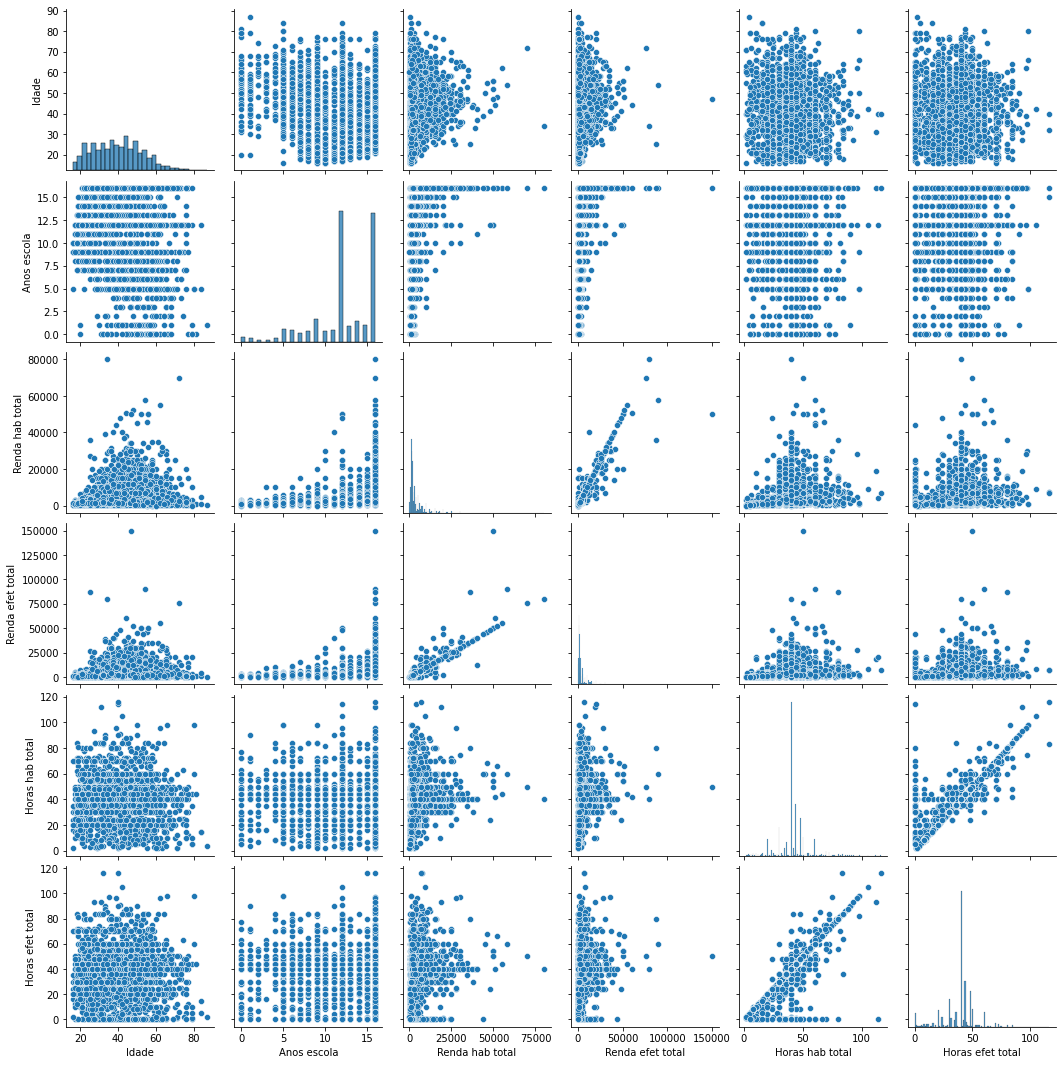

In [ ]:
# Gráfico de dispersão entre os pares de variáveis do dataframe
sns.pairplot(bsb)

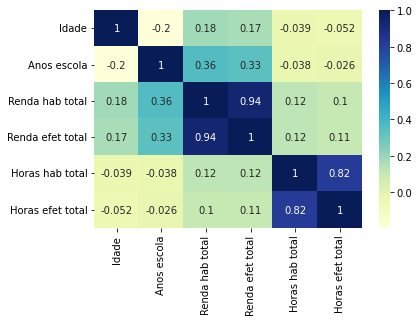

In [ ]:
# Mapa de calor para visualizar possíveis correlações entre as variáveis do dataframe
sns.heatmap(bsb.corr(), annot=True, cmap="YlGnBu")

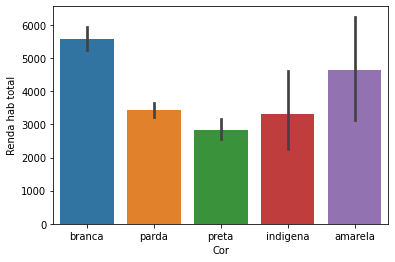

In [ ]:
# Gráfico de colunas para renda por cor
sns.barplot(x=bsb['Cor'], y=bsb['Renda hab total'])

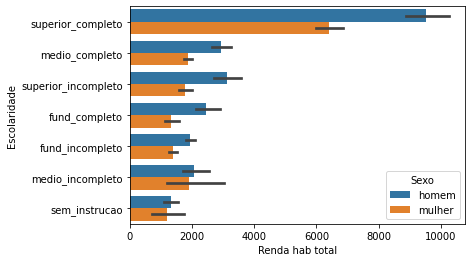

In [ ]:
sns.barplot(x=bsb['Renda hab total'], y=bsb['Escolaridade'], hue=bsb['Sexo'])

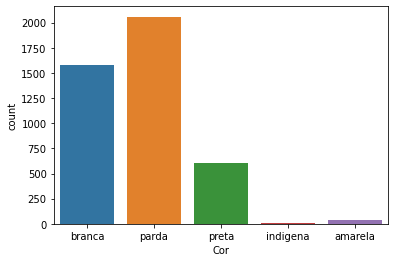

In [ ]:
# Gráfico de colunas para contagem de elementos numa categoria, no caso Cor
sns.countplot(x=bsb['Cor'])

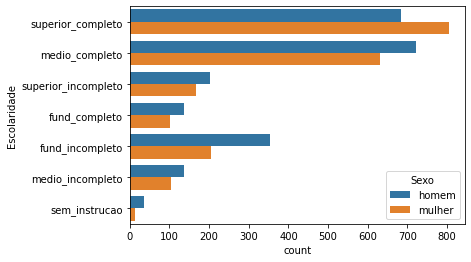

In [ ]:
# Gráfico de barras (horizontais) para contagem de elementos numa categoria (Escolaridade), mas agrupados por outra (Sexo)
sns.countplot(data=bsb, y='Escolaridade', hue='Sexo')

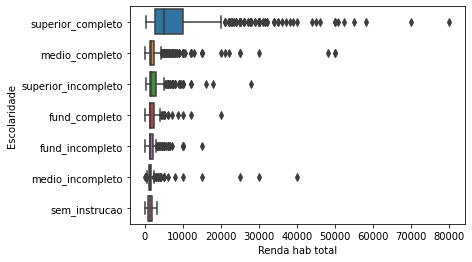

In [ ]:
# Diagrama de caixa (boxplot) para a renda por escolaridade
sns.boxplot(data=bsb, x='Renda hab total', y='Escolaridade')

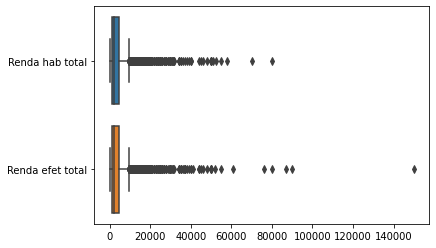

In [ ]:
sns.boxplot(data=bsb[['Renda hab total','Renda efet total']], orient='h')

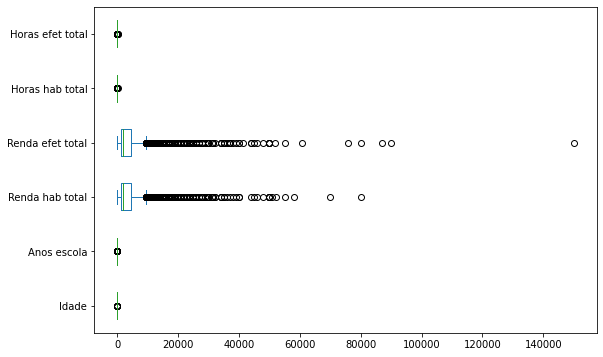

In [ ]:
bsb.plot(kind='box', vert=False, figsize=(9,6))

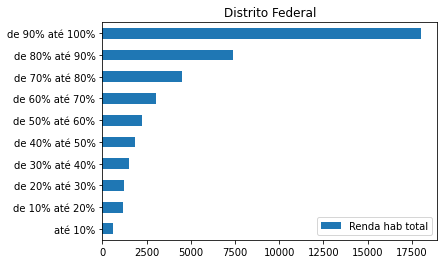

In [ ]:
# Gráfico de decis da renda
rotulos = ['até 10%', 'de 10% até 20%', 'de 20% até 30%', 'de 30% até 40%', 'de 40% até 50%', 'de 50% até 60%', 'de 60% até 70%', 'de 70% até 80%', 'de 80% até 90%', 'de 90% até 100%']
bsb['decis'] = pd.qcut(bsb['Renda hab total'].rank(method='first'),10, labels=rotulos)
bsb.groupby('decis')[['decis','Renda hab total']].mean().plot(kind='barh', title='Distrito Federal', xlabel='', ylabel='R$')
plt.show()

# Bônus

Com a ascensão do *Low Code* estão surgindo pacotes e bibliotecas que reduzem a necessidade de escrever linhas de código para obter resultados em análise de dados. Um deles é o `DataPrep`, que é uma biblioteca do Python que facilita a preparação e exploração de dados. Para maiores informações, consulte a documentação em https://dataprep.ai/.

![dataprep logo](https://raw.githubusercontent.com/sfu-db/dataprep/develop/assets/logo_cropped.jpg)

In [ ]:
# Primeiramente é preciso instalar o pacote
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 KB 20.

In [ ]:
# Estamos interessados na biblioteca EDA
from dataprep.eda import plot, plot_correlation, plot_missing, create_report

In [ ]:
# Eliminando a coluna decis
bsb.drop(columns=['decis'], inplace=True)

In [ ]:
# Para obter uma visão geral do conjunto de dados
plot(bsb)

In [ ]:
# Inspecionando dados ausentes
plot_missing(bsb)

In [ ]:
# Para identificar corrleações entre as variáveis
plot_correlation(bsb)

DataPrep Report
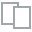
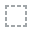
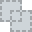
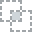
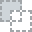
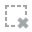
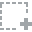
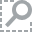
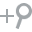
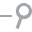
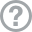
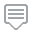
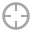
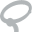
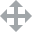
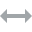
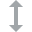
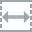
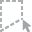
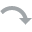
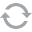
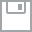
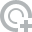
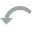
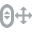
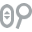
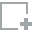
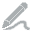
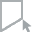
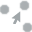
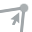
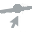

In [ ]:
# A biblioteca dataprep cria um relatório com insights sobre os dados
create_report(bsb)